In [1]:
import pandas as pd
import matplotlib.pyplot as ptd
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0d11ad94794c4cf1bdfa2674778377e7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ISMIBM4FfhZgay4uVNhUVZ-gRtt41CvCQSgCcEMAc3Vj',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_0d11ad94794c4cf1bdfa2674778377e7.get_object(Bucket='weatherforecastui-donotdelete-pr-cpvlq8vrjpr8eo',Key='weather.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_csv(body)
dataset.head()



,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,0.0,3.4,NW,30.0,20,29,1015.0,7,No,3.6,Yes
1,3.6,4.4,ENE,39.0,17,36,1008.4,3,Yes,3.6,Yes
2,3.6,5.8,NW,85.0,6,69,1007.2,7,Yes,39.8,Yes
3,39.8,7.2,NW,54.0,24,56,1007.0,7,Yes,2.8,Yes
4,2.8,5.6,SSE,50.0,28,49,1018.5,7,Yes,0.0,No


In [3]:
dataset

,Rainfall,Evaporation,WindGustDir,WindGustSpeed,WindSpeed3pm,Humidity3pm,Pressure3pm,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,0.0,3.4,NW,30.0,20,29,1015.0,7,No,3.6,Yes
1,3.6,4.4,ENE,39.0,17,36,1008.4,3,Yes,3.6,Yes
2,3.6,5.8,NW,85.0,6,69,1007.2,7,Yes,39.8,Yes
3,39.8,7.2,NW,54.0,24,56,1007.0,7,Yes,2.8,Yes
4,2.8,5.6,SSE,50.0,28,49,1018.5,7,Yes,0.0,No
5,0.0,5.8,SE,44.0,24,57,1021.7,5,No,0.2,No
6,0.2,4.2,SE,43.0,26,47,1022.2,6,No,0.0,No
7,0.0,5.6,E,41.0,24,57,1024.2,7,No,0.0,No
8,0.0,4.0,S,48.0,17,48,1022.7,7,No,16.2,Yes
9,16.2,5.4,E,31.0,6,32,1020.7,1,Yes,0.0,No


In [4]:
dataset=dataset.drop(["WindGustDir"],axis=1)

In [5]:
dataset.isnull().any()

Rainfall         False
Evaporation      False
WindGustSpeed     True
WindSpeed3pm     False
Humidity3pm      False
Pressure3pm      False
Cloud3pm         False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [6]:
dataset.isnull().any()

Rainfall         False
Evaporation      False
WindGustSpeed     True
WindSpeed3pm     False
Humidity3pm      False
Pressure3pm      False
Cloud3pm         False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [7]:
dataset['WindGustSpeed'].fillna((dataset["WindGustSpeed"].mean()),inplace=True)

In [8]:
dataset.isnull().any()


Rainfall         False
Evaporation      False
WindGustSpeed    False
WindSpeed3pm     False
Humidity3pm      False
Pressure3pm      False
Cloud3pm         False
RainToday        False
RISK_MM          False
RainTomorrow     False
dtype: bool

In [9]:
x=dataset.iloc[:,0:9].values

In [10]:
x

array([[0.0, 3.4, 30.0, ..., 7, 'No', 3.6],
       [3.6, 4.4, 39.0, ..., 3, 'Yes', 3.6],
       [3.6, 5.8, 85.0, ..., 7, 'Yes', 39.8],
       ..., 
       [0.0, 8.4, 43.0, ..., 2, 'No', 0.0],
       [0.0, 5.0, 46.0, ..., 7, 'No', 0.0],
       [0.0, 6.0, 78.0, ..., 1, 'No', 0.0]], dtype=object)

In [11]:
y=dataset.iloc[:,9].values
y

array(['Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes

In [12]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
x[:,7] = lb.fit_transform(x[:,7])

In [13]:
x.shape

(366, 9)

In [14]:
x

array([[0.0, 3.4, 30.0, ..., 7, 0, 3.6],
       [3.6, 4.4, 39.0, ..., 3, 1, 3.6],
       [3.6, 5.8, 85.0, ..., 7, 1, 39.8],
       ..., 
       [0.0, 8.4, 43.0, ..., 2, 0, 0.0],
       [0.0, 5.0, 46.0, ..., 7, 0, 0.0],
       [0.0, 6.0, 78.0, ..., 1, 0, 0.0]], dtype=object)

In [15]:
dt1=LabelEncoder()
y=dt1.fit_transform(y)

In [16]:
y

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [17]:
y.shape

(366,)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [19]:
x_train

array([[0.0, 8.4, 43.0, ..., 1, 0, 0.0],
       [0.0, 5.6, 33.0, ..., 2, 0, 0.0],
       [0.0, 6.8, 65.0, ..., 0, 0, 0.0],
       ..., 
       [0.0, 13.8, 50.0, ..., 2, 0, 2.0],
       [0.0, 2.0, 24.0, ..., 7, 0, 0.0],
       [4.0, 4.2, 39.0, ..., 1, 1, 0.0]], dtype=object)

In [20]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0])

In [21]:
x_test

array([[0.0, 1.4, 13.0, ..., 2, 0, 0.0],
       [0.0, 8.4, 50.0, ..., 7, 0, 3.0],
       [0.0, 1.0, 13.0, ..., 7, 0, 0.0],
       ..., 
       [0.0, 3.8, 31.0, ..., 5, 0, 0.0],
       [5.2, 3.8, 31.0, ..., 1, 1, 0.0],
       [0.0, 4.0, 33.0, ..., 6, 0, 0.0]], dtype=object)

In [22]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [67]:
from sklearn.preprocessing import StandardScaler
sxc=StandardScaler()
x_train=sxc.fit_transform(x_train)
x_test=sxc.transform(x_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
rtc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rtc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [69]:
x_train

array([[-0.35114371,  1.47151371,  0.2292429 , ..., -1.19043688,
        -0.49428553, -0.34873894],
       [-0.35114371,  0.42883725, -0.50136196, ..., -0.8206416 ,
        -0.49428553, -0.34873894],
       [-0.35114371,  0.87569859,  1.83657361, ..., -1.56023217,
        -0.49428553, -0.34873894],
       ..., 
       [-0.35114371,  3.48238973,  0.74066631, ..., -0.8206416 ,
        -0.49428553,  0.08793246],
       [-0.35114371, -0.91174676, -1.15890634, ...,  1.02833484,
        -0.49428553, -0.34873894],
       [ 0.499996  , -0.09250098, -0.06299904, ..., -1.19043688,
         2.02312216, -0.34873894]])

In [70]:
y_predict=rtc.predict(x_test)

In [71]:
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

In [72]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [73]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0])

In [74]:
from sklearn.metrics import accuracy_score
rtc_acc=accuracy_score(y_test,y_predict)
rtc_acc

0.98639455782312924

In [75]:
from  sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)

In [76]:
cm

array([[125,   0],
       [  2,  20]])

In [77]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.95454545454545459

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.89309090909090916

<function matplotlib.pyplot.plot>

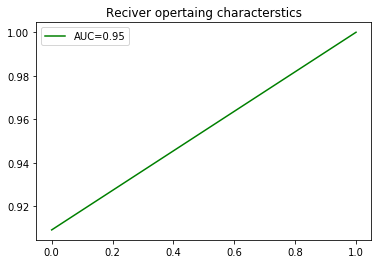

In [79]:
ptd.title("Reciver opertaing characterstics"
         )
ptd.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='green')
ptd.legend()
ptd.plot

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [82]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_predict)
acc_rf

0.95918367346938771

# Decision tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [84]:
y_predict1=dtc.predict(x_test)

In [85]:
y_predict1

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0])

In [86]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_predict1)
acc_dt

1.0

# SVM

In [87]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_predict2=svm.predict(x_test)
ac_svm=accuracy_score(y_test,y_predict2)
ac_svm

0.96598639455782309

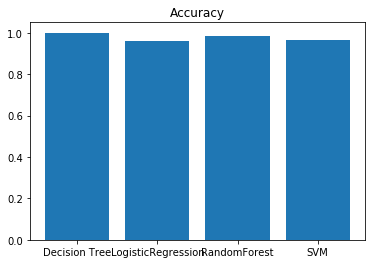

In [88]:
p=['RandomForest','Decision Tree','LogisticRegression','SVM']
q=[rtc_acc,acc_dt,acc_rf,ac_svm]
ptd.bar(p,q)
ptd.title('Accuracy')
ptd.show()

In [44]:
!pip install watson-machine-learning-client --upgrade

Requirement already up-to-date: watson-machine-learning-client in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (1.0.365)
Requirement not upgraded as not directly required: certifi in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2019.3.9)
Requirement not upgraded as not directly required: urllib3 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (1.22)
Requirement not upgraded as not directly required: tabulate in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.8.2)
Requirement not upgraded as not directly required: requests in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (2.18.4)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from watson-machine-learning-client) (0.21.0)
Requirement not upgraded as not direc

In [45]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
2019-05-23 08:42:16,106 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2019-05-23 08:42:19,228 - watson_machine_learning_client.wml_client_error - WARNING - Deployment creation failed. Error: 402. {"trace":"6f7957a842a48cd6f6826817e7387589","errors":[{"code":"deployments_plan_limit_reached","message":"Current plan 'lite' only allows 5 deployments"}]}


In [46]:
wml_credentials={
    "access_key": "tXS_NoCSNwMa8aLHt5jSSYohLSb3DtPQXwoZALa9FD8W",
    "instance_id": "665208e9-8ff4-4ce2-bfc4-a647fd42c7cd",
    "password": "4dcb387b-fcc5-4fd5-ab69-55c3c269b494",
    "url": "https://eu-gb.ml.cloud.ibm.com",
    "username": "6a31b24a-887b-46fb-a962-fa947464b9bb"
}

In [47]:
client = WatsonMachineLearningAPIClient(wml_credentials)
import json

In [48]:
instance_details = client.service_instance.get_details()
print(json.dumps(instance_details,indent=2))

{
  "entity": {
    "account": {
      "name": "Irshad Hussain's Account",
      "id": "1290023ccfbc455199f99a0cab2931c4",
      "type": "STANDARD"
    },
    "published_models": {
      "url": "https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/665208e9-8ff4-4ce2-bfc4-a647fd42c7cd/published_models"
    },
    "space_guid": "N/A",
    "owner": {
      "country_code": "IND",
      "email": "mirshadhussain514@gmail.com",
      "ibm_id": "5500034QJE",
      "user_id": "5441d4a9-4d39-47c1-a2dd-67467ff97f3a",
      "beta_user": false
    },
    "status": "Active",
    "tags": null,
    "organization_guid": "N/A",
    "usage": {
      "prediction_count": {
        "current": 3,
        "limit": 5000
      },
      "computation_time": {
        "current": 0,
        "limit": 180000
      },
      "deployment_count": {
        "current": 0,
        "limit": 5
      },
      "capacity_units": {
        "current": 3,
        "limit": 180000000
      },
      "model_count": {
        "current": 10,


In [49]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME:"Irshad Hussain",
              client.repository.ModelMetaNames.AUTHOR_EMAIL:"mirshadhussain514@gmail.com",
               client.repository.ModelMetaNames.NAME:"Random Forest"
              }

In [50]:
model_artifact = client.repository.store_model(rtc,meta_props=model_props)

In [51]:
published_model_uid = client.repository.get_model_uid(model_artifact)


In [52]:
published_model_uid

'e2d61878-4e8f-4bfa-aa9c-0d64d8c5076e'

In [53]:
client.deployments.list()

------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME              TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
dc359835-2d79-4aec-9580-74fab341b3de  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:22:18.718Z  scikit-learn-0.19  model
9e5b162f-c0d4-4de3-96fc-8af987198fdb  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:02:20.532Z  scikit-learn-0.19  model
d102e3a7-8111-4e92-ba1f-72831c05c172  multilinear       online  DEPLOY_SUCCESS  2019-05-22T06:57:26.259Z  scikit-learn-0.19  model
ebf01099-85df-4e43-b5f1-3aa3eaf2ba86  multilinear       online  DEPLOY_SUCCESS  2019-05-22T06:50:19.463Z  scikit-learn-0.19  model
cdb2d2d3-c8fb-4626-b448-c61c46ef8ac4  multilinear       online  DEPLOY_SUCCESS  2019-05-14T11:05:58.209Z  scikit-learn-0.19  model
------------------------------------  ----------------  ------  ---

In [59]:
client.deployments.delete('cdb2d2d3-c8fb-4626-b448-c61c46ef8ac4')

'SUCCESS'

In [61]:
client.deployments.delete('ebf01099-85df-4e43-b5f1-3aa3eaf2ba86')

'SUCCESS'

In [62]:
client.deployments.delete('d102e3a7-8111-4e92-ba1f-72831c05c172')

'SUCCESS'

In [63]:
client.deployments.list()

------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME              TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
dc359835-2d79-4aec-9580-74fab341b3de  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:22:18.718Z  scikit-learn-0.19  model
9e5b162f-c0d4-4de3-96fc-8af987198fdb  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:02:20.532Z  scikit-learn-0.19  model
------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------


In [64]:
created_deployment = client.deployments.create(published_model_uid, name="Weather Forecast")



#######################################################################################

Synchronous deployment creation for uid: 'e2d61878-4e8f-4bfa-aa9c-0d64d8c5076e' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2d565ace-e808-4dc8-ba23-7ce335e81a0e'
------------------------------------------------------------------------------------------------




In [65]:
scoring_endpoint =client.deployments.get_scoring_url(created_deployment)
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/665208e9-8ff4-4ce2-bfc4-a647fd42c7cd/deployments/2d565ace-e808-4dc8-ba23-7ce335e81a0e/online'

In [66]:
client.deployments.list()

------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME              TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
2d565ace-e808-4dc8-ba23-7ce335e81a0e  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:49:26.901Z  scikit-learn-0.19  model
dc359835-2d79-4aec-9580-74fab341b3de  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:22:18.718Z  scikit-learn-0.19  model
9e5b162f-c0d4-4de3-96fc-8af987198fdb  Weather Forecast  online  DEPLOY_SUCCESS  2019-05-23T08:02:20.532Z  scikit-learn-0.19  model
------------------------------------  ----------------  ------  --------------  ------------------------  -----------------  -------------
